In [2]:
#importing required libraries and staring spark
import operator
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords 
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from pyspark import SparkContext, SparkConf
os.environ["PYSPARK_PYTHON"] = "/Library/Frameworks/Python.framework/Versions/3.7/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"] = "/Library/Frameworks/Python.framework/Versions/3.7/bin/python3"
sc = SparkContext("local","PySpark")
contentRDD = sc.textFile("/Users/teja/Downloads/nytimes_news_articles.txt")

In [3]:
#preprocessing data 
contentRDD = contentRDD.filter(lambda x: len(x) > 0)
content = contentRDD.collect() # data is stored in a list
l = len(content)
for i in range(l):#removing unwanted symbols in strings
    if not content[i].startswith('URL'):
        content[i] = content[i].replace("-", "").replace("—","").replace("“","").replace(",","").replace("’","").replace("'","").replace("”","").replace(";","").replace(":","").replace("(","").replace(")","").replace("‘","")
        if content[i].endswith("."):
            content[i] = content[i].replace(".","")

In [4]:
content

['URL: http://www.nytimes.com/2016/06/30/sports/baseball/washington-nationals-max-scherzer-baffles-mets-completing-a-sweep.html',
 'WASHINGTON  Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes But they cannot produce an encore of their pennantwinning season if their lineup keeps floundering while their pitching is nicked bruised and stretched thin',
 'We were going to ride our pitching Manager Terry Collins said before Wednesdays game But were not riding it right now Weve got as many problems with our pitching as we do anything',
 'Wednesdays 42 loss to the Washington Nationals was cruel for the alreadylimping Mets Pitching in Steven Matzs place the spot starter Logan Verrett allowed two runs over five innings But even that was too large a deficit for the Mets lineup to overcome against Max Scherzer the Nationals starter',
 'Were not even giving ourselves chances Collins said adding later We just cant give our pitchers any room to work

In [5]:
#get data for sports category 
def get_sports_data(content):#collecting only sports related data from full text
    sports_category_data = []
    url = ""
    for row in content:
        if row.startswith("URL"):
            url = row
        elif "sports" in url:
            sports_category_data.append(row)
    return sports_category_data

In [6]:
sports_data = get_sports_data(content)   #sports data
sports_data

['WASHINGTON  Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes But they cannot produce an encore of their pennantwinning season if their lineup keeps floundering while their pitching is nicked bruised and stretched thin',
 'We were going to ride our pitching Manager Terry Collins said before Wednesdays game But were not riding it right now Weve got as many problems with our pitching as we do anything',
 'Wednesdays 42 loss to the Washington Nationals was cruel for the alreadylimping Mets Pitching in Steven Matzs place the spot starter Logan Verrett allowed two runs over five innings But even that was too large a deficit for the Mets lineup to overcome against Max Scherzer the Nationals starter',
 'Were not even giving ourselves chances Collins said adding later We just cant give our pitchers any room to work',
 'The Mets did not score until the ninth inning when a lastgasp tworun homer by James Loney off Nationals reliever Shawn Kelley

In [7]:
#split the each paragrapgh in sports_data
#ignore empty strings and removing stopwords and removing whitespaces in a string using strip function
def preprocess_sports_data(sports_data):
    sports_data_after_split = [i.split(" ") for i in sports_data]
    sw = stopwords.words('english')#stopwords using nltk
    sports_data_without_stopwords = []
    for lst in sports_data_after_split:
        new_lst = []
        for wrd in lst:
            wrd_lower = wrd.strip().lower()
            if (len(wrd) > 0) and (wrd_lower not in sw):
                new_lst.append(wrd_lower)

        sports_data_without_stopwords.append(new_lst)
    return sports_data_without_stopwords

In [8]:
processes_sports_data = preprocess_sports_data(sports_data)#processed data of sports category

In [9]:
processes_sports_data

[['washington',
  'stellar',
  'pitching',
  'kept',
  'mets',
  'afloat',
  'first',
  'half',
  'last',
  'season',
  'despite',
  'offensive',
  'woes',
  'cannot',
  'produce',
  'encore',
  'pennantwinning',
  'season',
  'lineup',
  'keeps',
  'floundering',
  'pitching',
  'nicked',
  'bruised',
  'stretched',
  'thin'],
 ['going',
  'ride',
  'pitching',
  'manager',
  'terry',
  'collins',
  'said',
  'wednesdays',
  'game',
  'riding',
  'right',
  'weve',
  'got',
  'many',
  'problems',
  'pitching',
  'anything'],
 ['wednesdays',
  '42',
  'loss',
  'washington',
  'nationals',
  'cruel',
  'alreadylimping',
  'mets',
  'pitching',
  'steven',
  'matzs',
  'place',
  'spot',
  'starter',
  'logan',
  'verrett',
  'allowed',
  'two',
  'runs',
  'five',
  'innings',
  'even',
  'large',
  'deficit',
  'mets',
  'lineup',
  'overcome',
  'max',
  'scherzer',
  'nationals',
  'starter'],
 ['even',
  'giving',
  'chances',
  'collins',
  'said',
  'adding',
  'later',
  'cant'

In [10]:
#getting all words pairs from each paragraph after removing stopwords and preprocessing
wordspairs = {}
for par in range(len(processes_sports_data)):
    for wrd in range(len(processes_sports_data[par])-1):
        biagram = processes_sports_data[par][wrd] + " " + processes_sports_data[par][wrd+1]
        if biagram not in wordspairs:
            wordspairs[biagram] = 1
        else:
            wordspairs[biagram] += 1    

In [11]:
wordspairs

{'washington stellar': 1,
 'stellar pitching': 1,
 'pitching kept': 1,
 'kept mets': 1,
 'mets afloat': 1,
 'afloat first': 1,
 'first half': 83,
 'half last': 2,
 'last season': 303,
 'season despite': 5,
 'despite offensive': 1,
 'offensive woes': 3,
 'woes cannot': 1,
 'cannot produce': 1,
 'produce encore': 1,
 'encore pennantwinning': 1,
 'pennantwinning season': 1,
 'season lineup': 1,
 'lineup keeps': 1,
 'keeps floundering': 1,
 'floundering pitching': 1,
 'pitching nicked': 1,
 'nicked bruised': 1,
 'bruised stretched': 1,
 'stretched thin': 1,
 'going ride': 3,
 'ride pitching': 1,
 'pitching manager': 2,
 'manager terry': 91,
 'terry collins': 105,
 'collins said': 233,
 'said wednesdays': 4,
 'wednesdays game': 27,
 'game riding': 2,
 'riding right': 1,
 'right weve': 6,
 'weve got': 109,
 'got many': 3,
 'many problems': 5,
 'problems pitching': 1,
 'pitching anything': 1,
 'wednesdays 42': 1,
 '42 loss': 4,
 'loss washington': 1,
 'washington nationals': 49,
 'nationals c

In [12]:
#top 10 word pairs
k = Counter(wordspairs) 
# Finding top10 word pairs 
top10_wordpairs = k.most_common(10)
word_pairs = dict(top10_wordpairs)
word_pairs

{'united states': 685,
 'last year': 423,
 'first time': 323,
 'new york': 307,
 'last season': 303,
 'los angeles': 274,
 'world cup': 272,
 'home run': 255,
 'years ago': 244,
 'major league': 243}

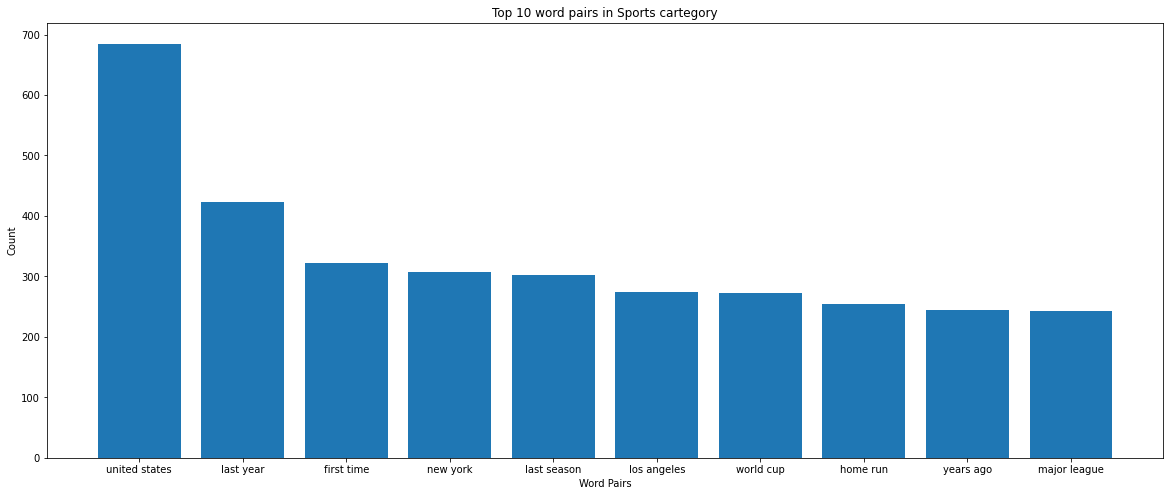

In [47]:
#visualizing the top 10 word_pairs graphically
plt.figure(figsize=(20, 8))
plt.bar(list(word_pairs.keys()), list(word_pairs.values()))
plt.xlabel("Word Pairs")
plt.ylabel("Count")
plt.title("Top 10 word pairs in Sports cartegory")
x_pos = [i for i, _ in enumerate(list(word_pairs.keys()))]
plt.show()

In [48]:
pwd


'/Users/teja'